<a href="https://colab.research.google.com/github/DataScienceLab-DSLABI/Ensemble-Anomaly-Detection/blob/main/%5BDS_LAB_1%5D-%20data%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d icsdataset/hai-security-dataset

100% 795M/798M [00:10<00:00, 109MB/s]
100% 798M/798M [00:10<00:00, 78.6MB/s]


In [7]:
! unzip hai-security-dataset.zip

Archive:  hai-security-dataset.zip
  inflating: graph/boiler/dcs_1001h.json  
  inflating: graph/boiler/dcs_1001h.png  
  inflating: graph/boiler/dcs_1002h.json  
  inflating: graph/boiler/dcs_1002h.png  
  inflating: graph/boiler/dcs_1003h.json  
  inflating: graph/boiler/dcs_1003h.png  
  inflating: graph/boiler/dcs_1004h.json  
  inflating: graph/boiler/dcs_1004h.png  
  inflating: graph/boiler/dcs_1010h.json  
  inflating: graph/boiler/dcs_1010h.png  
  inflating: graph/boiler/dcs_1011h.json  
  inflating: graph/boiler/dcs_1011h.png  
  inflating: graph/boiler/dcs_1020h.json  
  inflating: graph/boiler/dcs_1020h.png  
  inflating: graph/boiler/phy_boiler.json  
  inflating: graph/boiler/phy_boiler.png  
  inflating: graph/graph_analysis.ipynb  
  inflating: hai-20.07/test1.csv     
  inflating: hai-20.07/test2.csv     
  inflating: hai-20.07/train1.csv    
  inflating: hai-20.07/train2.csv    
  inflating: hai-21.03/test1.csv     
  inflating: hai-21.03/test2.csv     
  inflating: 

In [8]:
import pandas as pd

In [9]:
df_train1 = pd.read_csv('/content/hai-22.04/train1.csv')

In [10]:
df_train2 = pd.read_csv('/content/hai-22.04/train2.csv')

In [11]:
df_train3 = pd.read_csv('/content/hai-22.04/train3.csv')

In [12]:
df_train4 = pd.read_csv('/content/hai-22.04/train4.csv')

In [13]:
df_train5 = pd.read_csv('/content/hai-22.04/train5.csv')

In [14]:
df_train6 = pd.read_csv('/content/hai-22.04/train6.csv')

In [15]:
df_test1 = pd.read_csv('/content/hai-22.04/test1.csv')

In [16]:
df_test2 = pd.read_csv('/content/hai-22.04/test2.csv')

In [17]:
df_test3 = pd.read_csv('/content/hai-22.04/test3.csv')

In [18]:
df_test4 = pd.read_csv('/content/hai-22.04/test4.csv')

In [19]:
df_Train = pd.concat([df_train1, df_train2, df_train3, df_train4, df_train5, df_train6], ignore_index=True)

In [20]:
df_Test = pd.concat([df_test1, df_test2, df_test3, df_test4], ignore_index=True)

In [21]:
df_ALL = pd.concat([df_Train,df_Test], ignore_index=True)

In [22]:
num_rows, num_cols = df_ALL.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1365602
Number of columns: 88


**Display and describe the data**

In [23]:
df_Train.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
1,2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2,2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0
3,2021-07-11 10:00:03,0.08771,0.89214,476.76703,1014.79321,26.92264,14.82246,404.38739,30.10407,16.30247,...,7.08818,281.50317,0.00101,14917,280.49048,271.64716,8.90254,9914,27171,0
4,2021-07-11 10:00:04,0.08771,0.89191,476.76703,1014.79321,26.92264,14.73087,382.53925,30.10331,15.79237,...,7.08818,281.34039,0.00043,14997,283.47437,272.80457,8.90254,9914,27171,0


In [24]:
df_Test.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
1,2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2,2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
3,2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
4,2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0


In [25]:
df_ALL['timestamp'] = pd.to_datetime(df_ALL['timestamp'])


In [26]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
1,2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2,2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0
3,2021-07-11 10:00:03,0.08771,0.89214,476.76703,1014.79321,26.92264,14.82246,404.38739,30.10407,16.30247,...,7.08818,281.50317,0.00101,14917,280.49048,271.64716,8.90254,9914,27171,0
4,2021-07-11 10:00:04,0.08771,0.89191,476.76703,1014.79321,26.92264,14.73087,382.53925,30.10331,15.79237,...,7.08818,281.34039,0.00043,14997,283.47437,272.80457,8.90254,9914,27171,0


In [27]:
df_Train.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,...,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1.004402e+06,1004402.0
mean,1.233080e-01,1.105594e+00,4.486695e+02,1.009977e+03,3.009478e+01,6.914063e+01,2.202201e+03,3.386906e+01,6.496662e+01,6.507154e+01,...,4.192900e+00,3.662623e+02,-3.072510e-05,1.807884e+04,3.309293e+02,3.311973e+02,1.430943e+01,9.972942e+03,2.721090e+04,0.0
std,4.335728e-02,1.044498e-01,3.038842e+01,3.981555e+01,2.886617e+00,4.188169e+01,1.329775e+03,2.897106e+00,4.091532e+01,4.124122e+01,...,3.445795e+00,6.061224e+01,1.644198e-03,1.773992e+03,3.629854e+01,3.275944e+01,1.319813e+01,2.536939e+01,1.056617e+02,0.0
min,5.498000e-02,7.719300e-01,3.921769e+02,8.900452e+02,2.518253e+01,0.000000e+00,1.112275e+01,2.815872e+01,0.000000e+00,2.685500e-01,...,0.000000e+00,2.309570e+02,-4.253000e-02,1.285100e+04,2.303603e+02,2.330910e+02,0.000000e+00,9.826000e+03,2.686600e+04,0.0
25%,9.438000e-02,1.039300e+00,4.226432e+02,9.775195e+02,2.692264e+01,1.818661e+01,5.533513e+02,3.083306e+01,1.521881e+01,1.500092e+01,...,0.000000e+00,3.180339e+02,-1.090000e-03,1.705300e+04,3.068034e+02,3.123553e+02,1.106540e+00,9.960000e+03,2.716700e+04,0.0
50%,1.149200e-01,1.104280e+00,4.481150e+02,1.007838e+03,3.200000e+01,1.000000e+02,3.176862e+03,3.548735e+01,9.376555e+01,9.403381e+01,...,5.327940e+00,3.652344e+02,-7.000000e-05,1.805100e+04,3.309643e+02,3.306026e+02,1.362378e+01,9.973000e+03,2.723000e+04,0.0
75%,1.643400e-01,1.171867e+00,4.761058e+02,1.030605e+03,3.218818e+01,1.000000e+02,3.184745e+03,3.602524e+01,1.000000e+02,1.005112e+02,...,6.862630e+00,4.146954e+02,1.010000e-03,1.909600e+04,3.542571e+02,3.498264e+02,2.125391e+01,9.999000e+03,2.726800e+04,0.0
max,1.997200e-01,1.627390e+00,4.981196e+02,1.121855e+03,3.347964e+01,1.000000e+02,3.190000e+03,3.805496e+01,1.000000e+02,1.008774e+02,...,1.000000e+01,4.997649e+02,4.051000e-02,2.682600e+04,4.968533e+02,4.942672e+02,5.000000e+01,1.025000e+04,2.754300e+04,0.0


In [28]:
df_Test.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,...,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000,361200.000000
mean,0.126046,1.117674,454.550574,995.900507,26.089655,12.191671,389.177033,29.895099,10.532877,10.121219,...,3.989632,366.495356,-0.000026,18251.113231,333.800331,334.064354,18.575738,9976.207248,27092.724059,0.033306
std,0.040121,0.112257,26.943286,30.576226,0.938886,16.477405,514.762268,0.995085,7.999513,8.189536,...,2.979348,59.551641,0.001640,1916.262614,38.940988,35.514027,6.440079,31.162028,100.739719,0.179434
min,0.059445,0.776570,410.712460,954.549500,25.461390,0.000000,7.150280,28.269350,0.000000,0.276180,...,0.716042,230.523010,-0.012510,12758.000000,229.709230,232.693120,6.828800,9669.000000,26855.000000,0.000000
25%,0.087930,1.047080,430.783600,973.447330,25.461390,0.000000,28.005140,29.222600,4.842795,4.579160,...,2.403980,319.552980,-0.001090,17147.000000,308.485290,313.747800,11.467260,9957.000000,27011.000000,0.000000
50%,0.126880,1.111900,456.424710,992.821230,25.687170,6.599195,237.547780,29.485430,9.242525,8.859250,...,3.344280,364.999270,0.000000,18153.000000,332.863160,332.085510,20.989594,9973.000000,27089.000000,0.000000
75%,0.150450,1.179480,482.788790,1024.175660,25.687170,18.142370,547.392640,30.401770,15.165312,14.894100,...,5.863560,413.718870,0.001010,19209.000000,355.541140,351.598690,22.404540,9999.000000,27166.000000,0.000000
max,0.197490,1.619730,494.232640,1047.185670,27.804180,100.000000,3140.576660,33.015210,62.886310,63.203430,...,9.960400,499.782960,0.015480,26731.000000,497.233090,493.037480,28.460800,10248.000000,27410.000000,1.000000


In [29]:
df_ALL.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,...,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06
mean,1.240322e-01,1.108789e+00,4.502251e+02,1.006253e+03,2.903543e+01,5.407770e+01,1.722658e+03,3.281795e+01,5.056896e+01,5.053725e+01,...,4.139136e+00,3.663239e+02,-2.954958e-05,1.812440e+04,3.316887e+02,3.319556e+02,1.543786e+01,9.973806e+03,2.717964e+04,8.809302e-03
std,4.254247e-02,1.067036e-01,2.963008e+01,3.810249e+01,3.079346e+00,4.464151e+01,1.417792e+03,3.083401e+00,4.271566e+01,4.308279e+01,...,3.329990e+00,6.033359e+01,1.643099e-03,1.814300e+03,3.703746e+01,3.353390e+01,1.194270e+01,2.706093e+01,1.166721e+02,9.344359e-02
min,5.498000e-02,7.719300e-01,3.921769e+02,8.900452e+02,2.518253e+01,0.000000e+00,7.150280e+00,2.815872e+01,0.000000e+00,2.685500e-01,...,0.000000e+00,2.305230e+02,-4.253000e-02,1.275800e+04,2.297092e+02,2.326931e+02,0.000000e+00,9.669000e+03,2.685500e+04,0.000000e+00
25%,9.197000e-02,1.041290e+00,4.226432e+02,9.764675e+02,2.568717e+01,7.737977e+00,2.464856e+02,2.960559e+01,1.029477e+01,1.002655e+01,...,7.160420e-01,3.184498e+02,-1.090000e-03,1.707700e+04,3.072193e+02,3.127170e+02,4.962950e+00,9.959000e+03,2.709300e+04,0.000000e+00
50%,1.190800e-01,1.106350e+00,4.507441e+02,1.004426e+03,2.796980e+01,4.608420e+01,1.452088e+03,3.175242e+01,2.260329e+01,2.238617e+01,...,3.353010e+00,3.651620e+02,-7.000000e-05,1.807800e+04,3.314706e+02,3.309823e+02,1.524029e+01,9.973000e+03,2.721300e+04,0.000000e+00
75%,1.553900e-01,1.173940e+00,4.764483e+02,1.030246e+03,3.200000e+01,1.000000e+02,3.182367e+03,3.583221e+01,1.000000e+02,1.002747e+02,...,6.862630e+00,4.144242e+02,1.010000e-03,1.912600e+04,3.545826e+02,3.503147e+02,2.192189e+01,9.999000e+03,2.725200e+04,0.000000e+00
max,1.997200e-01,1.627390e+00,4.981196e+02,1.121855e+03,3.347964e+01,1.000000e+02,3.190000e+03,3.805496e+01,1.000000e+02,1.008774e+02,...,1.000000e+01,4.997830e+02,4.051000e-02,2.682600e+04,4.972331e+02,4.942672e+02,5.000000e+01,1.025000e+04,2.754300e+04,1.000000e+00


In [30]:
import matplotlib.pyplot as plt

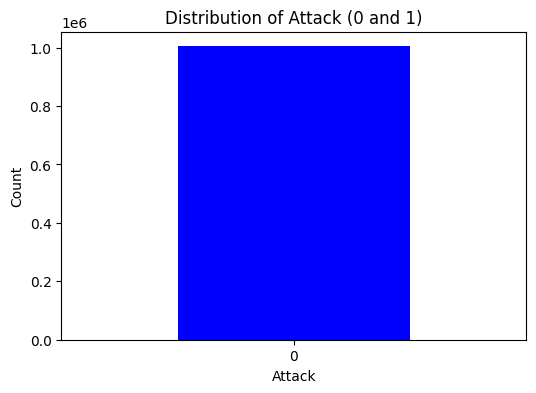

In [31]:
plt.figure(figsize=(6, 4))
df_Train['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

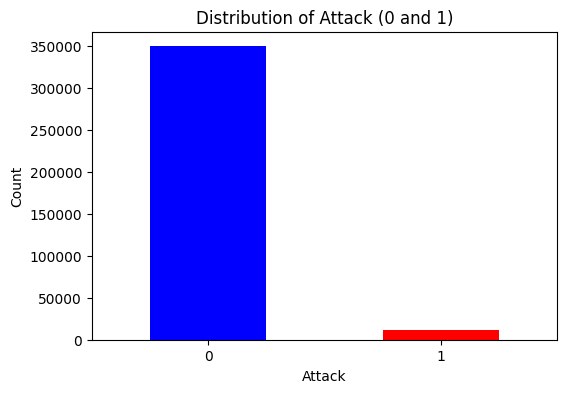

In [32]:
plt.figure(figsize=(6, 4))
df_Test['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Check for null values**

In [33]:
null_counts = df_ALL.isnull().sum()
for i in null_counts:
  if i!=0:
    print(null_counts)
else:
    print("the dataset does not have null values")

the dataset does not have null values


**Check for duplicates**

In [34]:
duplicates = df_ALL[df_ALL.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


**check for columns with one value: **

In [36]:
# Get the number of unique values in each column
unique_counts = df_ALL.nunique()

# Filter columns with only one unique value
columns_with_one_value = unique_counts[unique_counts == 1].index.tolist()

if columns_with_one_value:
    print("Columns with only one unique value:")
    print(columns_with_one_value)
else:
    print("No columns with only one unique value.")

Columns with only one unique value:
['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04']


In [37]:
# Drop the identified columns
df_ALL.drop(columns=columns_with_one_value, inplace=True)

print("Columns dropped:", columns_with_one_value)

Columns dropped: ['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04']


In [38]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
1,2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2,2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0
3,2021-07-11 10:00:03,0.08771,0.89214,476.76703,1014.79321,26.92264,14.82246,404.38739,30.10407,16.30247,...,7.08818,281.50317,0.00101,14917,280.49048,271.64716,8.90254,9914,27171,0
4,2021-07-11 10:00:04,0.08771,0.89191,476.76703,1014.79321,26.92264,14.73087,382.53925,30.10331,15.79237,...,7.08818,281.34039,0.00043,14997,283.47437,272.80457,8.90254,9914,27171,0


In [45]:

df_ALL

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,12.01019,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,12.56714,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,14.48975,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0
2021-07-11 10:00:03,0.08771,0.89214,476.76703,1014.79321,26.92264,14.82246,404.38739,30.10407,16.30247,15.93170,...,7.08818,281.50317,0.00101,14917,280.49048,271.64716,8.90254,9914,27171,0
2021-07-11 10:00:04,0.08771,0.89191,476.76703,1014.79321,26.92264,14.73087,382.53925,30.10331,15.79237,16.10718,...,7.08818,281.34039,0.00043,14997,283.47437,272.80457,8.90254,9914,27171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16 23:59:56,0.06944,1.04908,467.03854,1015.06964,25.68717,29.89865,1056.03259,29.45263,14.31306,15.03143,...,2.40398,373.20966,0.00036,17966,318.08813,327.31122,26.76094,9917,26971,0
2021-07-16 23:59:57,0.06944,1.05057,467.03854,1015.06964,25.68717,29.95392,1026.05530,29.45758,15.02294,13.74206,...,2.40398,376.66376,-0.00470,18073,317.78070,327.36548,26.76094,9917,26970,0
2021-07-16 23:59:58,0.06944,1.04839,467.03854,1015.06964,25.68717,29.99687,981.37659,29.45034,16.00788,13.64288,...,2.40398,377.76691,-0.00130,17983,319.11890,326.62396,26.76094,9916,26973,0


**Check for highly correlated columns**

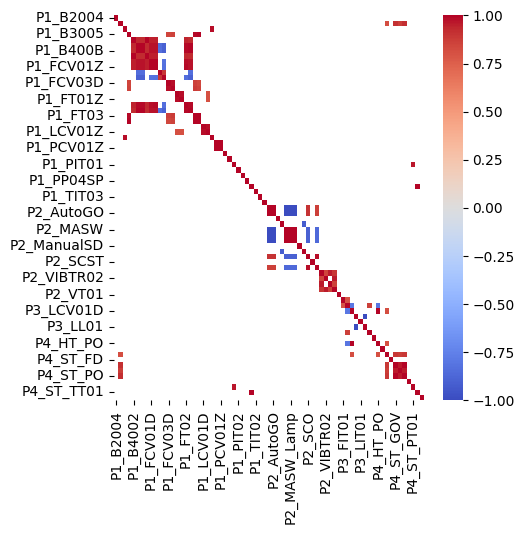

In [47]:
import seaborn as sns
# Compute the correlation matrix
corr_matrix = df_ALL.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [40]:
import numpy as np
df_out = trimm_correlated(df_ALL,0.9)

<ipython-input-39-a227d7c00209>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_in.corr(method='pearson', min_periods=1)


In [41]:
df_out.shape

(1365602, 40)

In [42]:
train_mask = df_out.index.isin(df_Train.index)
common_columns = df_out.columns
# Split the combined dataset back into train and test datasets
df_train_filtered = df_out[train_mask][common_columns]
df_test_filtered = df_out[~train_mask][common_columns]

In [43]:
df_train_filtered.shape

(1004402, 40)

In [44]:
df_test_filtered.shape

(361200, 40)

In [45]:
if df_test_filtered.shape[0] == df_Test.shape[0]:
    print("Same number of rows")

Same number of rows


In [46]:
if df_train_filtered.shape[0] == df_Train.shape[0]:
    print("Same number of rows")

Same number of rows


In [47]:
df_Train = df_train_filtered

In [48]:
df_Test = df_test_filtered

**Feature selection**

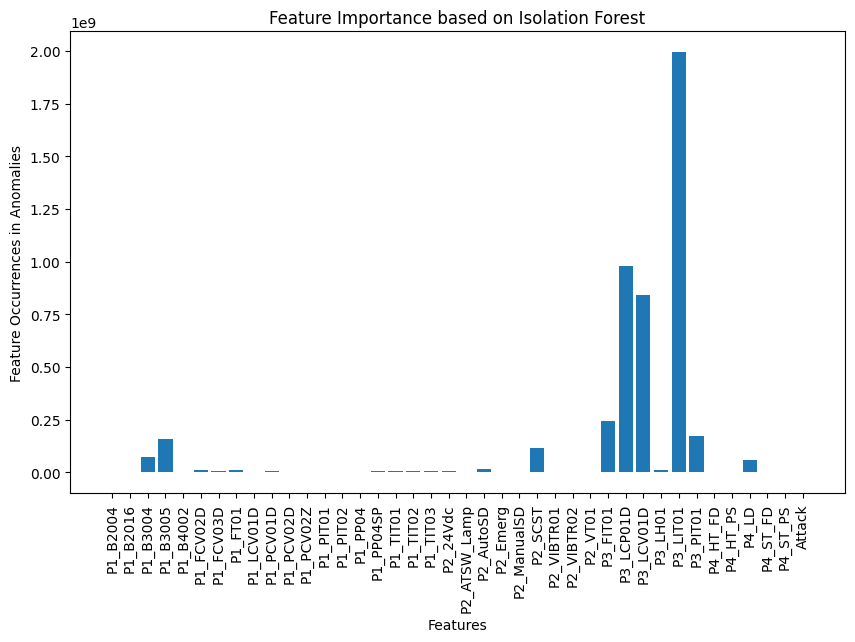

In [49]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess categorical data (one-hot encoding)
df_train_encoded = pd.get_dummies(df_Train)
df_test_encoded = pd.get_dummies(df_Test)

# Initialize Isolation Forest model
model = IsolationForest()

# Fit the model to the training data
model.fit(df_train_encoded)

# Predict anomalies on the test set
predictions = model.predict(df_test_encoded)

# Get the indices of anomalies
anomaly_indices = [i for i, prediction in enumerate(predictions) if prediction == -1]

# Count the occurrence of each feature in anomalies
feature_occurrences = df_test_encoded.iloc[anomaly_indices].sum()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_occurrences)), feature_occurrences, tick_label=df_test_encoded.columns)
plt.xlabel('Features')
plt.ylabel('Feature Occurrences in Anomalies')
plt.title('Feature Importance based on Isolation Forest')
plt.xticks(rotation=90)
plt.show()


In [50]:
feature_occurrences.sort_values()

P2_VIBTR02     -4.381203e+05
P4_ST_FD       -2.028913e+01
P4_HT_FD        1.468972e+01
P2_Emerg        1.140000e+02
Attack          6.766000e+03
P1_B2004        2.019751e+04
P1_PIT02        9.275675e+04
P2_ATSW_Lamp    1.529370e+05
P1_B2016        1.773863e+05
P1_PIT01        1.787952e+05
P4_HT_PS        7.537942e+05
P2_VIBTR01      8.305088e+05
P2_VT01         1.895888e+06
P1_PCV02D       1.907262e+06
P1_PCV02Z       1.907288e+06
P2_ManualSD     2.004326e+06
P1_LCV01D       2.297062e+06
P1_PP04         2.630174e+06
P4_ST_PS        2.778822e+06
P1_B4002        4.116599e+06
P1_TIT03        4.372102e+06
P1_PP04SP       4.390604e+06
P2_24Vdc        4.453084e+06
P1_TIT01        4.779712e+06
P1_PCV01D       4.879421e+06
P1_TIT02        6.613523e+06
P1_FCV03D       7.717378e+06
P1_FT01         9.691525e+06
P3_LH01         1.111922e+07
P1_FCV02D       1.245775e+07
P2_AutoSD       1.784451e+07
P4_LD           5.687079e+07
P1_B3004        7.285489e+07
P2_SCST         1.143689e+08
P1_B3005      

In [51]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004402 entries, 0 to 1004401
Data columns (total 40 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   P1_B2004      1004402 non-null  float64
 1   P1_B2016      1004402 non-null  float64
 2   P1_B3004      1004402 non-null  float64
 3   P1_B3005      1004402 non-null  float64
 4   P1_B4002      1004402 non-null  float64
 5   P1_FCV02D     1004402 non-null  float64
 6   P1_FCV03D     1004402 non-null  float64
 7   P1_FT01       1004402 non-null  float64
 8   P1_LCV01D     1004402 non-null  float64
 9   P1_PCV01D     1004402 non-null  float64
 10  P1_PCV02D     1004402 non-null  float64
 11  P1_PCV02Z     1004402 non-null  float64
 12  P1_PIT01      1004402 non-null  float64
 13  P1_PIT02      1004402 non-null  float64
 14  P1_PP04       1004402 non-null  float64
 15  P1_PP04SP     1004402 non-null  float64
 16  P1_TIT01      1004402 non-null  float64
 17  P1_TIT02      1004402 non-n

Categorical data

In [49]:
cols = df_ALL.columns

In [52]:
 num_cols = df_ALL._get_numeric_data().columns

In [51]:
print("categorical data: ")
list(set(cols) - set(num_cols))

categorical data: 


[]

Normalization

In [53]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(df_ALL)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df_ALL.columns)

# Print the first few rows of the normalized DataFrame
print(normalized_df.head())

   P1_B2004  P1_B2016  P1_B3004  P1_B3005  P1_B4002  P1_B4005  P1_B400B  \
0   0.22613  0.132221  0.798452  0.538147  0.209725  0.150771  0.184712   
1   0.22613  0.133566  0.798452  0.538147  0.209725  0.149720  0.164743   
2   0.22613  0.136102  0.798452  0.538147  0.209725  0.149013  0.139470   
3   0.22613  0.140521  0.798452  0.538147  0.209725  0.148225  0.124805   
4   0.22613  0.140252  0.798452  0.538147  0.209725  0.147309  0.117941   

   P1_B4022  P1_FCV01D  P1_FCV01Z  ...  P4_HT_PS     P4_LD  P4_ST_FD  \
0  0.194185   0.155046   0.116706  ...  0.708818  0.170394  0.501686   
1  0.194570   0.162002   0.122242  ...  0.708818  0.169588  0.519147   
2  0.195302   0.165335   0.141351  ...  0.708818  0.183223  0.503492   
3  0.196575   0.163025   0.155684  ...  0.708818  0.189334  0.524326   
4  0.196498   0.157924   0.157428  ...  0.708818  0.188730  0.517341   

   P4_ST_GOV  P4_ST_LD  P4_ST_PO  P4_ST_PS  P4_ST_PT01  P4_ST_TT01  Attack  
0   0.141029  0.174745  0.134610  0.178